In [1]:
%matplotlib inline
import spindex.pandas
import shapely.geometry
import pandas
import geopandas
geoms = [shapely.geometry.LineString([(0, 0), (1, 1)]), shapely.geometry.LineString([(3, 0), (-2, 2)])]
attributes = ['z', 'y']
left_df = geopandas.GeoDataFrame({'geometry': geoms, 'attr': attributes})
left_df.index.name = 'left_id'
geoms = [shapely.geometry.LineString([(0, 1), (1, 2)]), shapely.geometry.LineString([(1, 0), (2, 2)]), shapely.geometry.LineString([(1, 1.1), (0, 2)]), shapely.geometry.LineString([(0, 0), (2, 0), (2, 2),(0, 2), (0, 0)]),shapely.geometry.LineString([(-1.3, 0), (-1, 2)]), shapely.geometry.LineString([(-1.3, 0), (-1, 2)]), shapely.geometry.LineString([(-1, -1), (-0.5, 0)]), shapely.geometry.LineString([(-10, 0), (-1, 5)]), shapely.geometry.LineString([(0.5, -0.5), (0, -1), (-1, 4)]), shapely.geometry.LineString([(4, 0.6), (-3, 0.5)])]
attributes = ['A', 'B', 'A', 'B', 'B', 'C', 'D', 'C', 'E', 'E']
right_df = geopandas.GeoDataFrame({'geometry': geoms, 'attr': attributes})
right_df.index.name = 'right_id'

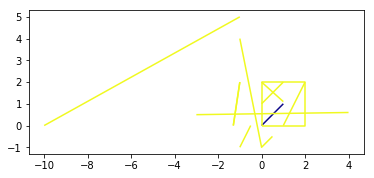

In [5]:
df_viz = left_df.copy()
df_viz.index = [100, 101]
df_viz['color'] = 'left'
df_viz = pandas.concat([df_viz, right_df])
df_viz['color'] = df_viz['color'].fillna('right')
df_viz.drop(101).plot(column='color', cmap='plasma')

## True 3-nearest neighbours using pairwise distances

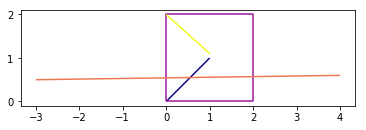

In [3]:
lg = left_df.loc[0, 'geometry']
ridx = right_df.geometry.apply(lambda g: lg.distance(g)).sort_values().index[:3].tolist()
df_viz.loc[[100] + ridx].plot(cmap='plasma')

## Index-assisted approximate 3-nearest neighbours using rtree

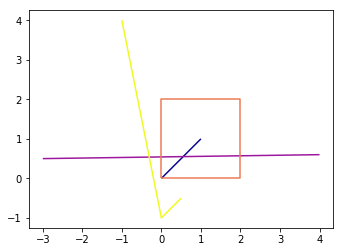

In [4]:
import rtree
sindex = rtree.index.Index(((i, b, None) for i, b in right_df.geometry.apply(lambda g: g.bounds).iteritems()))
tmp = list(sindex.nearest(lg.bounds, 3))
ridx2 = right_df.loc[tmp, 'geometry'].apply(lambda g: lg.distance(g)).sort_values().index[:3].tolist()
df_viz.loc[[100] + ridx2].plot(cmap='plasma')